# Logging Metrics

In [1]:
from mlflow_for_ml_dev.experiments.exp_utils import get_or_create_experiment
import matplotlib.pyplot as plt
import mlflow

In [2]:
# creating experiments
experiment_name = "logging_function"
tags = {
    "project_name":"UNDEFINED",
    "topic":"run_management",
    "mlflow.note.content":"This experiment is used to test the logging function."
}

experiment = get_or_create_experiment(experiment_name, tags)

In [3]:
# logging metrics
with mlflow.start_run(run_name="logging_metrics", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0)

    # logging multiple metrics as a dictionary
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: 558ac173536b412d98f5469d2ea88c99


### Using `step` parameter when logging metrics

In [4]:
# Training a deep learning model 
import random
epochs = 100
batch_size = 32
# simulate training loop
# in this case we are providing the run_id and experiment_id
# this is useful when we want to log metrics to an existing run
with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    
    # simulate training loop
    for epoch in range(1,epochs+1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch

        # In this case every step represents an epoch
        # since we have defined 100 epochs, we will have 100 steps
        mlflow.log_metric("accuracy", acc, step=epoch)
        mlflow.log_metric("loss",loss, step = epoch)

    # logging a single metric
    mlflow.log_metric("m1", 4.0, step=1)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 4.0, "m3": 7.0}, step=1)

In [5]:
client = mlflow.MlflowClient()

In [6]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = run.info.run_id, key="accuracy")

In [7]:
len(metric_history)

100

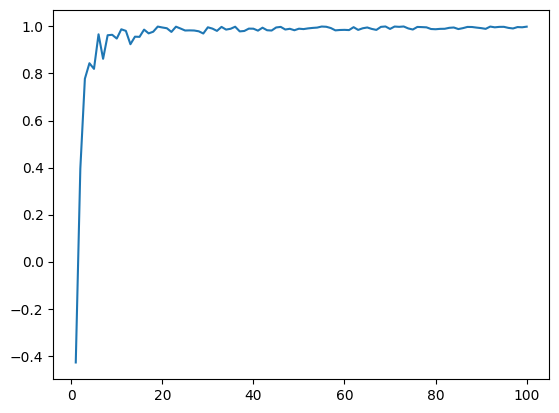

In [8]:
metric_value = [m.value for m in metric_history]
plt.plot(range(1,epochs+1), metric_value)

In [9]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = run.info.run_id, key = "m1")
metric_history

[<Metric: key='m1', step=0, timestamp=1729454043580, value=2.0>,
 <Metric: key='m1', step=1, timestamp=1729454044176, value=4.0>]

# Logging Parameters

In [10]:
with mlflow.start_run(run_name="logging_params", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single parameter
    mlflow.log_param("p1", 2.0)

    # logging multiple parameters
    mlflow.log_params({"p2": 3.0, "p3": 4.0, "p4":"This is a parameter."})

Run ID: d92828664c8d46f79ba5f99b395af4c4


# Logging Dict

In [11]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary as json
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.json")

    # logging a dictionary as yaml 
    config = {
        "dev":{
            "epochs": 100,
            "batch_size": 32
        },
        "test":{
            "epochs": 50,
            "batch_size": 16
        },
        "prod":{
            "epochs": 10,
            "batch_size": 8
        }
    }
    mlflow.log_dict(dictionary=config, artifact_file="files/config.yaml")
    mlflow.log_dict(dictionary=config, artifact_file="files/config.json")


Run ID: 33a2c7746c2f4ed1831585d36404fad6


# Logging Artifacts

In [12]:
#Log a single artifact (file)
with mlflow.start_run(run_name="logging_artifact", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifact(local_path="./images/mlflow_run.jpeg",artifact_path="images")

Run ID: ecfc8f50c3414248a6d6622ce48bd0c3


In [13]:
with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging artifacts
    mlflow.log_artifacts(local_dir="./images",artifact_path="images")

Run ID: f427d9bc43d54c608c391274d0305e7b


# Logging Figure

Log a figure as an artifact. The following figure objects are supported:

* matplotlib.figure.Figure

* plotly.graph_objects.Figure

Run ID: 20c133a2f6f64382a5867851819551c2


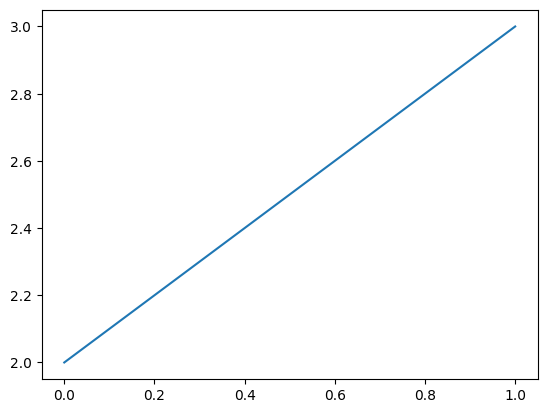

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])


with mlflow.start_run(run_name="logging_figure", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a figure
    mlflow.log_figure(fig, artifact_file="figures/figure.png")

# Logging Image

Log an image as an artifact. The following image objects are supported:

* numpy.ndarray

* PIL.Image.Image

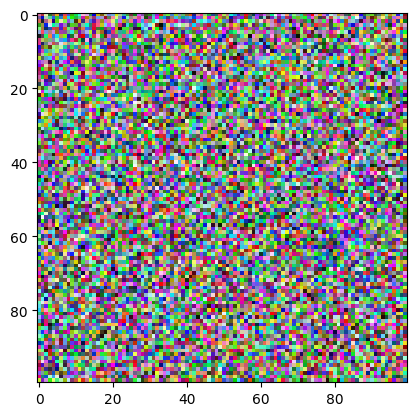

Run ID: 20aabee9515f4814abe0aef168d68f1e


In [25]:
import numpy as np
from matplotlib import pyplot as plt

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

plt.imshow(image, interpolation='nearest')
plt.show()

with mlflow.start_run(run_name="logging_image", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an image
    mlflow.log_image(image, artifact_file="image.png")

# Logging Table

Log a table to MLflow Tracking as a JSON artifact. If the artifact_file already exists in the run, the data would be appended to the existing artifact_file.

* data – Dictionary or pandas.DataFrame to log.

* artifact_file – The run-relative artifact file path in posixpath format to which the table is saved (e.g. “dir/file.json”).

In [37]:
import mlflow

table_dict = {
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
}

with mlflow.start_run(run_name="logging_table", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

Run ID: 4fa0e74cae2341fab75091ba0d568134


In [38]:
# Appending more info

table_dict = {
    "inputs": ["This is a new input"],
    "outputs": ["This is a new output"],
    "toxicity": [10.0],
    "new_column": ["This is a new column."],
}

with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

Run ID: 4fa0e74cae2341fab75091ba0d568134


In [40]:
import pandas as pd

df = pd.DataFrame({
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
})

with mlflow.start_run(run_name="logging_dataframe", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=df, artifact_file="results.json")

Run ID: 1a32ae656fc64bb989426576598d79fd


# Logging Text

Log text as an artifact.

In [45]:
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)
    # Log text to a file under the run's root artifact directory
    mlflow.log_text(text = "simple string",artifact_file= "file1.txt")

    # Log HTML text
    mlflow.log_text(text = "<h1>header</h1>", artifact_file= "index.html")

    # Log HTML text
    mlflow.log_text(text = "<h1>header</h1>", artifact_file= "index.txt")

Run ID: 564319a5deac4874a6babd85b9e61c0b


In [46]:
rich_text = """
<h1>Header</h1>
<p>This is a paragraph.</p>

<ol>
    <li>item 1</li>
    <li>item 2</li>
    <li>item 3</li>
</ol>

<p><strong>bold text</strong> and <em>italic text</em></p>
"""
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)

    # Log HTML text
    mlflow.log_text(text = rich_text, artifact_file= "index.html")


Run ID: 6449b8a4f8ff4b51b11d0f062e75024e
